<a href="https://colab.research.google.com/github/rihemmaarefe/Link-Prediction/blob/main/Link%20Prediction%20Using%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [4]:
# load nodes details
with open("/content/drive/MyDrive/fb-pages-food.nodes") as f:
    fb_nodes = f.read().splitlines() 

# load edges (or links)
with open("/content/drive/MyDrive/fb-pages-food.edges") as f:
    fb_links = f.read().splitlines() 

len(fb_nodes), len(fb_links)

(621, 2102)

In [5]:
# capture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 2102/2102 [00:00<00:00, 1037348.75it/s]


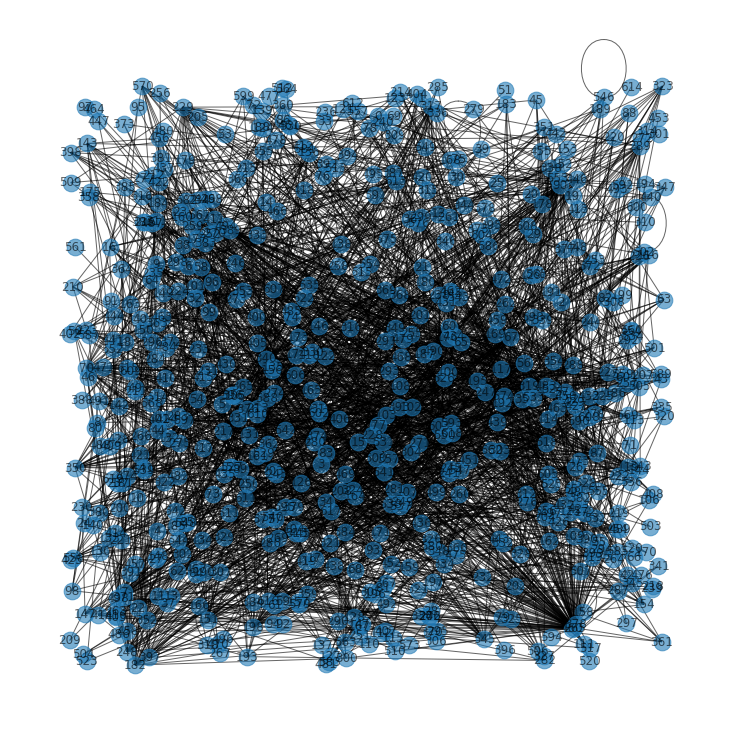

In [6]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2")

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=True,  pos = pos, node_size = 280, alpha = 0.6, width = 1)

Lets first of all do some analysis on our nodes and eages and measure the centrality values, which are :



*   Degree
*   closeness
*   betweeness 


But first lets see how many nodes and edges do we have :

In [7]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components: %d" % nx.number_connected_components(G))

Number of nodes : 620
Number of edges : 2102
Number of connected components: 1


We have a sample graph of 620 nodes, for 2102 edges. 



There are 1 connected components, which means that there is no part of the graph that is detached from the rest.



1.   Degree measurements



In [8]:
# Calculate the degree of each node
deg = nx.degree(G,nbunch=None, weight=None )
print(deg)

[('0', 6), ('276', 11), ('58', 15), ('132', 2), ('603', 27), ('398', 9), ('555', 17), ('1', 2), ('265', 134), ('611', 47), ('2', 3), ('182', 31), ('345', 11), ('3', 10), ('608', 7), ('377', 10), ('40', 7), ('352', 19), ('450', 7), ('484', 3), ('299', 13), ('65', 8), ('185', 9), ('228', 2), ('557', 5), ('227', 15), ('90', 51), ('151', 21), ('394', 1), ('4', 4), ('287', 2), ('254', 17), ('336', 2), ('5', 1), ('503', 2), ('6', 5), ('429', 7), ('163', 6), ('486', 3), ('478', 10), ('518', 59), ('7', 7), ('293', 4), ('305', 4), ('339', 4), ('35', 22), ('444', 3), ('583', 4), ('8', 5), ('278', 2), ('434', 22), ('73', 2), ('98', 7), ('369', 4), ('9', 28), ('317', 32), ('288', 37), ('206', 3), ('289', 26), ('249', 5), ('593', 14), ('550', 21), ('131', 26), ('446', 20), ('89', 43), ('15', 10), ('340', 55), ('248', 25), ('229', 31), ('56', 47), ('570', 14), ('189', 5), ('107', 12), ('23', 14), ('465', 16), ('67', 56), ('351', 11), ('498', 33), ('10', 2), ('393', 4), ('258', 7), ('11', 6), ('212',

In [ ]:
# Degree centrality 
from networkx.algorithms.centrality.degree_alg import degree_centrality
def degree():
  x = degree_centrality(G)
  for i, j in x.items():
    T = i,format(j*100, ".4f") 
    H = print(T)
  return H

# Test
deg = degree()




2.   Closeness Centrality



In [10]:
# Closeness Centrality
from networkx.algorithms.centrality.closeness import closeness_centrality
def closeness_centralities(source):
  if source in G:
            x = closeness_centrality(G, u = source, distance=None, wf_improved=True)
            print('the closeness centrality of', source, 'is:' ,x*100, '%')
            # return 'the closeness centrality of', source, 'is:' ,x*100, '%'
            # return format(x*100, ".4f") 
  else:
    print('node not in the graph')

# Test 
cl = closeness_centralities('178')
cl

the closeness centrality of 178 is: 16.752368064952638 %




3.   Betweeness Centrality





In [ ]:
# Betweenness centrality: This function computes the shortest-path betweenness centrality for nodes.
from networkx.algorithms.centrality.betweenness_subset import betweenness_centrality_source
def betweenness_centrality(source):
  if source in G:
            x = betweenness_centrality_source(G, normalized=True, weight=None, sources= source)
            for k, v in x.items():
              if v != 0.0:
                print('the betweenness centrality between' , source, 'and', k,'is:', v, '%')
  else:
    print('node not in the graph')

# Test
bt = betweenness_centrality('147')

In [ ]:
# Edge betweenness centralities: Compute betweenness centrality for all edges.
from networkx.algorithms.centrality.betweenness import edge_betweenness_centrality
def edge_betweenness_centralities():
  x = edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)
  return x

  # Test
edge = edge_betweenness_centralities()
edge

Another thing that maybe can help us in our analysis is finding the shortest path between nodes.

For that reason, I choose dijkstra Algorithm.

In [13]:
from networkx.algorithms.shortest_paths.weighted import dijkstra_path
def dijkstrapath(source,target):
  print('Returns the shortest path from source to target in a weighted graph G')
  if (source and target) in G:
    x = dijkstra_path(G , source= source, target= target, weight="weight")
    print(x)
  # else:
  #   print('nodes are not in the graph')
  
dij = dijkstrapath('0','54')
dij

Returns the shortest path from source to target in a weighted graph G
['0', '58', '23', '54']


In [14]:
from networkx.algorithms.shortest_paths.weighted import dijkstra_path_length
def dijkstraPathLength(source,target):
  print('Returns the length of the shortest path from source to target in a weighted graph G')
  if (source and target) in G:
    x = dijkstra_path_length(G , source= source, target= target, weight="weight")
    # print(x)
    return x 
  else:
    print('nodes are not in the graph')

dijkstra_path_length = dijkstraPathLength('0' , '22')
dijkstra_path_length

Returns the length of the shortest path from source to target in a weighted graph G


4

In [15]:
from networkx.algorithms.shortest_paths.weighted import dijkstra_predecessor_and_distance
def dijProdAndDist(source):
  print('Compute shortest path length and predecessors on shortest paths (path of just 2 nodes) in weighted graphs.')
  if (source) in G:
    x = dijkstra_predecessor_and_distance(G, source=source, cutoff= 2, weight="weight")
    return x 
  else:
    print('nodes are not in the graph')

dijo = dijProdAndDist('78')
dijo

Compute shortest path length and predecessors on shortest paths (path of just 2 nodes) in weighted graphs.


({'129': ['154'],
  '154': ['78'],
  '158': ['78'],
  '180': ['331'],
  '210': ['78'],
  '214': ['78'],
  '223': ['210', '154', '252', '214', '452', '158'],
  '252': ['78'],
  '331': ['78'],
  '437': ['78'],
  '452': ['78'],
  '521': ['437'],
  '533': ['154', '214'],
  '534': ['214'],
  '55': ['78'],
  '78': []},
 {'129': 2,
  '154': 1,
  '158': 1,
  '180': 2,
  '210': 1,
  '214': 1,
  '223': 2,
  '252': 1,
  '331': 1,
  '437': 1,
  '452': 1,
  '521': 2,
  '533': 2,
  '534': 2,
  '55': 1,
  '78': 0})



---

> Now lets begin with our work ✈

How do we evaluate the link prediction? We must hide a subset of node pairs, and predict their links based on the rules defined above. We then evaluate the proportion of correct predictions for dense graphs, or use Area under the Curve criteria for Sparse graphs.


So, we will remove some removable links to see next if our work is right or not 

---



In [16]:
# Remove 20% of the edges
proportion_edges = 0.2
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# Create a copy of the graph and remove the edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

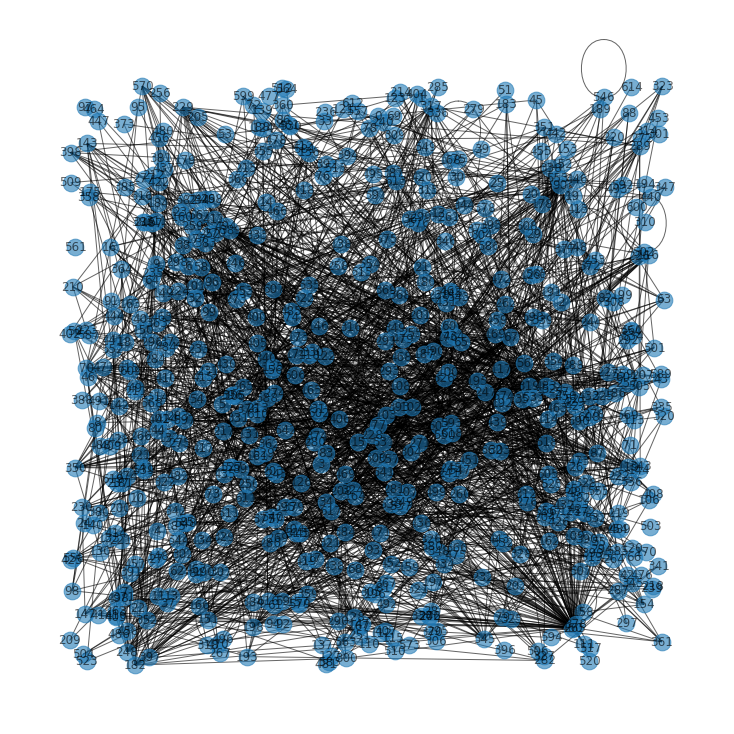

In [17]:
plt.figure(figsize=(10,10))
nx.draw(G_train, with_labels=True,  pos = pos, node_size = 280, alpha = 0.6, width = 1)
plt.gca().collections[0]

In [18]:
edge_subset_size = len(list(edge_subset))
print("Number of edges deleted : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m - edge_subset_size))

Number of edges deleted : 420
Number of edges remaining : 1682


After a long analysis, I choose to work with 4 algorithms (approches) to make a final desision and say that we can say that this 2 nodes can be linked.



1.   Common Neighbors
2.   Jaccard Coefficient
3.   Adamic-Adar
4.   Preferential Attachment









---
At first we are going to use the similarity approach:


So the first one is the common neighbors (CN) ✈ 

As I said on 
[My reseach link](https://www.researchgate.net/publication/357827099_Link_prediction_in_Social_Network_Analysis_Steps_and_Algorithms)

The CN is defined as the number of nodes with 
which both x and y have a direct relationship for 
two nodes, x and y. A larger number of shared 
neighbours makes it easier to establish a link 
between x and y


In [19]:
fb_df2 = fb_df.astype('int')
# create graph
G = nx.from_pandas_edgelist(fb_df2, "node_1", "node_2", create_using=nx.Graph())
G_new = nx.convert_node_labels_to_integers(G)

# Make prediction using Common neighbors
u = 1
v = 22
def cmm(u,v):
  if (u in G_new) and (v in G_new):
    sorted(nx.common_neighbors(G_new, u, v))
    if sorted(nx.common_neighbors(G_new, u, v)) == []:
      print('they have no common neighbours ', sorted(nx.common_neighbors(G_new, u, v)), '=> They will not be linked')
    else:
      print('they have common neighbours ', sorted(nx.common_neighbors(G_new, u, v)), '=> They will be linked')
  else:
    print('Nodes not found')

cn =cmm(u,v)

# sorted(nx.common_neighbors(G_new, 21, 22))

they have no common neighbours  [] => They will not be linked


Here we can interpret that if the node are not that close they will not have any common connection means no common neighbours, so this approach work just woth the nearest nodes to each others.

As I said on the review paper on [My reseach link](https://www.researchgate.net/publication/357827099_Link_prediction_in_Social_Network_Analysis_Steps_and_Algorithms)

So this approach is not the perfect one for our problem, becaue we want to know if any unconnected nodes even they are super far can be connected or not.


---

Now lets try another approach which is quite similar to the first one, but we should try it: 

*   Jaccard Coefficient (JC):  

The Jaccard 
Coefficient (JC) is used to standardize the size 
of shared neighbours. Higher values are 
assumed for pairs of nodes that have a higher 
fraction of common neighbours compared to the 
total number of neighbours they have.



**0 <= JC <= 1**


*   if JC = 0 => they share no members, they are 0% similar.

*   if JC = 1 => nodes are similar and they have same links so they can be 100% connected

*   if JC = 0.5 => The midway point — 50% similar — means that the two sets share half of the members.



---


**I assumed that if JC >= 50% then the nodes will be linked else no.**

---


In [ ]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

pred_jaccard

In [21]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
auc_jaccard*100

83.53444556203425

It gives us an AUC = 85.74%


**it is good but not enough.**


Again this approach working just if nodes are close or linked, so it wont be successful measure for common elements among 2 nodes.

These 2 algorithms are good for a problem that have to predict if neigbours (near nodes) could be connected or not.



---
Now lets see the :

**Adamic-Adar Coefficient (AA):** 

The AA 
I is made to compute similarity between two web pages, 
and it has since become popular in social 
networks. 


    **Which is usefull for our project, Because our nodes are facebook pages.**


Jaccard's coefficient is used to 
develop the AA measure. Common neighbours 
with fewer neighbours, on the other hand, are 
given greater weight.



In [ ]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])
pred_adamic*100

In [23]:
# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

auc_adamic*100
# print(pred_adamic)

84.56415512504194

In [24]:
# Prediction using Adamic Adar 
def prediction__(u,v):
  if u in G and v in G:
    preds = nx.adamic_adar_index(G, [(u, v)])
    for u, v, p in preds:
      print('(%d, %d) -> %.8f' % (u, v, p))
  else:
    print('nodes not found')

In [25]:
pred = prediction__(413,58)

(413, 58) -> 0.56899276


In [ ]:
preds = nx.adamic_adar_index(G)
lst = list(preds)
lst

In [27]:
import json
json.dumps(lst)

'[[0, 1, 0], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0], [0, 6, 0], [0, 7, 0], [0, 8, 0], [0, 9, 0], [0, 10, 0], [0, 11, 0], [0, 12, 0], [0, 13, 0], [0, 14, 0], [0, 15, 0], [0, 16, 0], [0, 17, 0], [0, 18, 0], [0, 19, 0], [0, 20, 0], [0, 21, 0], [0, 22, 0], [0, 23, 0.36926937306885504], [0, 24, 0], [0, 25, 0], [0, 26, 0], [0, 27, 0], [0, 28, 0], [0, 29, 0], [0, 30, 0], [0, 31, 0], [0, 32, 0], [0, 33, 0], [0, 34, 0], [0, 35, 0.36926937306885504], [0, 36, 0], [0, 37, 0], [0, 38, 0], [0, 39, 0.30341307554227914], [0, 40, 0], [0, 41, 0], [0, 42, 0], [0, 43, 0], [0, 44, 0], [0, 45, 0], [0, 46, 0], [0, 47, 0], [0, 48, 0], [0, 49, 0], [0, 50, 0], [0, 51, 0], [0, 52, 0], [0, 53, 0], [0, 54, 0], [0, 55, 0], [0, 56, 0.30341307554227914], [0, 57, 0], [0, 59, 0], [0, 60, 0], [0, 61, 0], [0, 62, 0], [0, 63, 0], [0, 64, 0], [0, 65, 0], [0, 66, 0], [0, 67, 0.30341307554227914], [0, 68, 0.30341307554227914], [0, 69, 0], [0, 70, 0], [0, 71, 0], [0, 72, 0], [0, 73, 0], [0, 74, 0], [0, 75, 0], [0, 76, 0],

In [28]:
# Using a JSON string
import json
with open('data.json', 'w') as f:
    json.dump(lst, f)

It gives us a better AUC result which is equal to 87.12%



---




**Preferential Attachment PA**

We can also use community information when it is available.





*   The PA metric indicates that new links will be more likely to
connect higher-degree nodes than lower ones



In [ ]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

pred_pref

In [30]:
fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

auc_pref*100

76.42330352123523

But it gave us a low UC = 78.66%

The Adamic-Adar seems to outperform the other criteria on our problem, so im going to use it for my prediction

And we will use this model as an API using FastApi